# [190108] Naive Bayes Classification
### : 높은 차원의 데이터에 적합한 빠르고 간단한 classification 알고리즘

### ■ 베이즈 정리
#### - 조건부 확률에 대한 수학적 정리

사후 확률 P(A|B)를 구하고자 할때
P(A),P(B),P(B|A)를 바탕으로 사후확률 P(A|B)를 구할 수 있다.





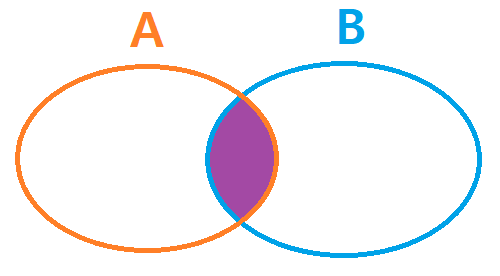

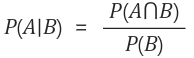

                                - 조건부 확률 P(A|B) 는 사건 B가 발생한 경우에  A가 발생할 확률을 의미


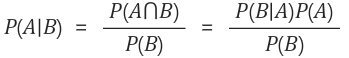

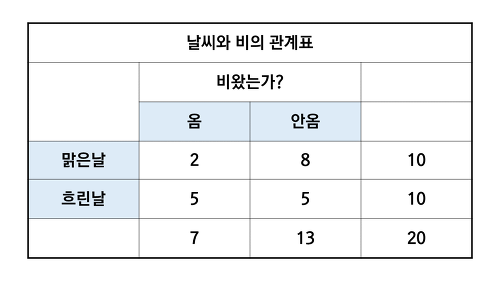
- P(비|맑은날) 은?

--------------

### ■ 나이브베이즈 
#### - 조건부 확률에 대한 수학적 정리
데이터셋의 모든 특징들이 동등하고 독립적이라고 가정

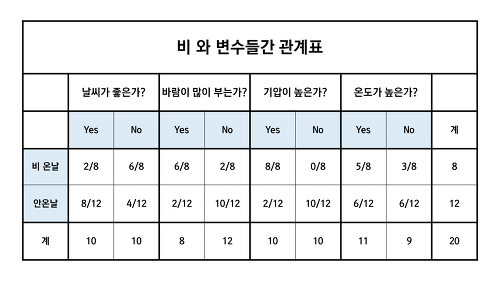

즉, 날씨/바람/기압/온도 각각 특징들이 서로 영향을 받지 않고, 각각 독립적으로 비가 올 확률에 영향을 준다는 가정에서 출발

#### 만약 오늘 '날씨가 좋고, 바람이 많이 불지 않고, 기압은 높은데, 온도가 낮다면' 오늘은 비가 올것인가? 안올것인가?

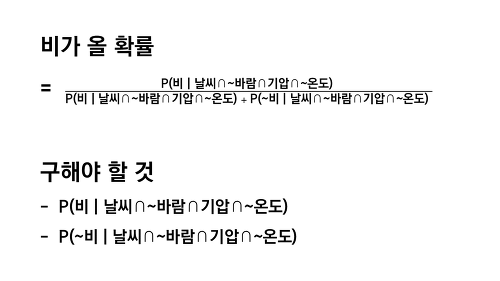

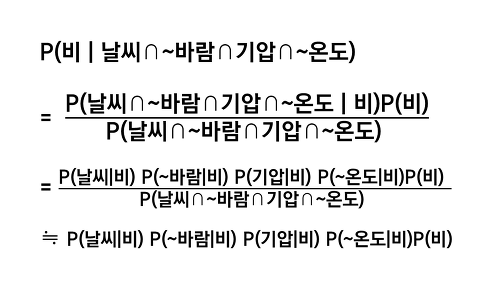

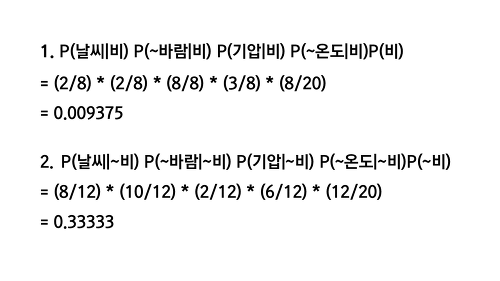

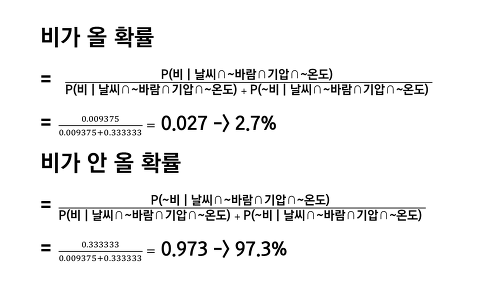

#### 즉, 날씨가 좋고 바람은 안불고 기압 높고 온도가 낮은 경우에 비가 올 확률은 2.7 %, 비가 안 올 확률은 97.3%를 의미

### ■ Laplace smoothing

#### 실제 데이터가 나타나지 않아 0으로 표시되는 경우, 전체 수식이 0이 되어버리는 상황이 발생

이러한 상황을 피하기 위해, 라플라스 스무딩은 각 계산식에 대개 1을 더해서 각 특징 값이 최소한 한번은 나타나도록 조정함

--------------

### scikit-learn의 나이브 베이즈 모듈인 sklearn.naive_bayes는 총 3가지 나이브 베이즈 분류기를 제공

1. Gaussian Naive Bayes
2. Multinomial Naive Bayes
3. Bernoulli Naive Bayes

## 1. Gaussian Naive Bayes
#### 각 데이터가 가우시안 분포(=정규 분포)를 따르는 연속적인 데이터일때 사용
** 정규분포: 평균을 중심으로 좌우대칭인 종 모양을 갖는 확률 분포로,평균/분산에 의해 결정
(ex.키,몸무게,성적 등)

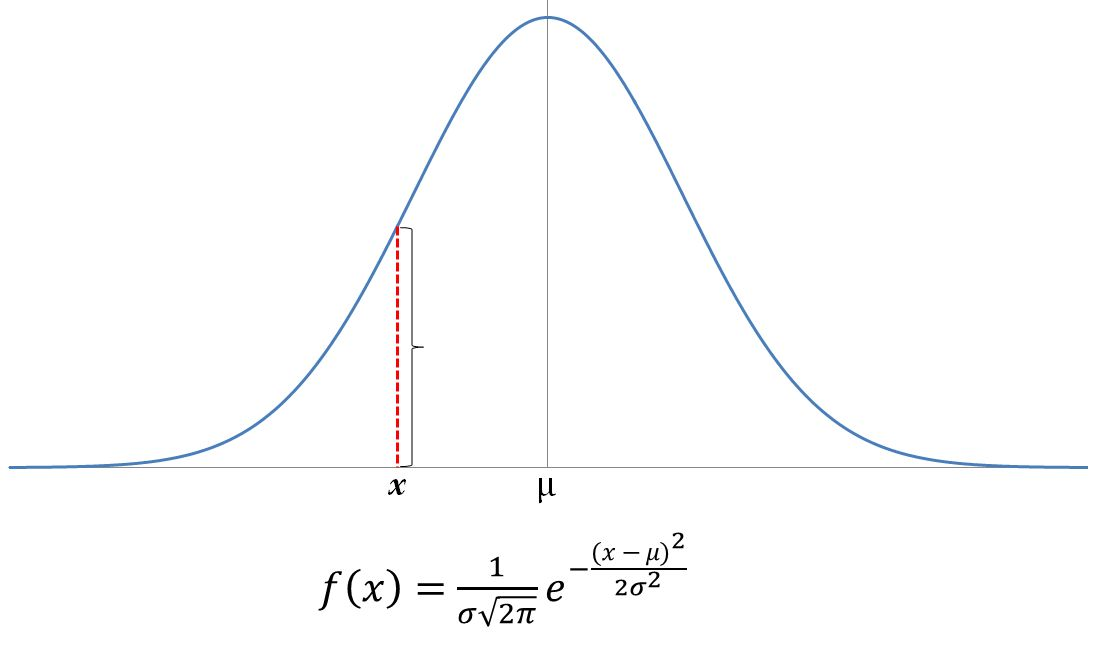

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

(100, 2)


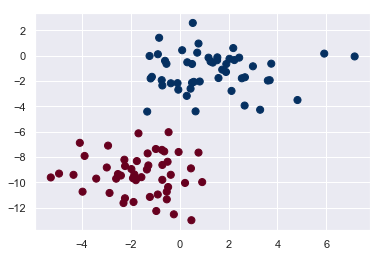

In [2]:
#make_blobs : 가우시안 정규분포를 이용해 가상 데이터를 생성(보통 클러스터링 용 가상데이터 만들때 사용)

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=1.5)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

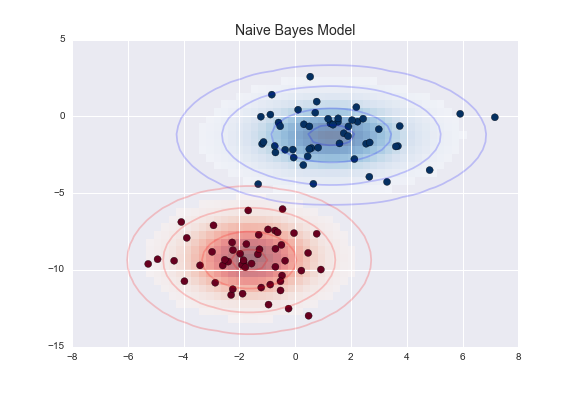

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [4]:
# 클래스 array 출력
model.classes_

array([0, 1])

In [5]:
# 각 클래스에 있는 샘플 수
model.class_count_

array([50., 50.])

In [6]:
"""
사전 확률 출력
즉, 전체 가운데 class 0의 확률 P(C0)과 class 1의 확률 P(C1)
"""

model.class_prior_

array([0.5, 0.5])

In [7]:
# class 0에 대한 각 feature 별 평균 - 분산 출력
model.theta_[0], model.sigma_[0]

(array([-1.64939095, -9.36891451]), array([2.06097005, 2.47716872]))

In [8]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
ynew

array([1, 1, 1, ..., 0, 1, 1])

In [9]:
# 각 input 값에 대해 class 0일 확률 / class 1일 확률
yprob = model.predict_proba(Xnew)
yprob.round(3)

array([[0.   , 1.   ],
       [0.001, 0.999],
       [0.   , 1.   ],
       ...,
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.153, 0.847]])

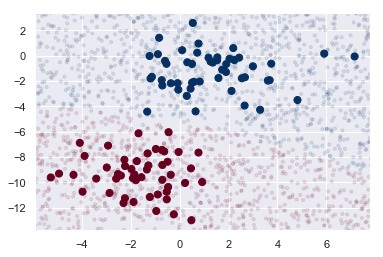

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=10, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### iris 데이터로 Gaussian Naive Bayes Classfication
#### new_data = [[3.6,2.8,  1,  1]] 일 경우, 어떤 종인지 맞추기

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
iX = iris.data
iy = iris.target
# 0 - setosa / 1 - versicolor / 2 - virginica 
# sepal length / sepal width / petal length / petal width 순서임

In [14]:
model = GaussianNB()
model.fit(iX, iy);

In [15]:
model.classes_

array([0, 1, 2])

In [16]:
model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [17]:
model.theta_[2], model.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [18]:
# Create new observation
new_data = [[3.6,2.8, 1, 1]]
model.predict_proba(new_data).round(2),model.predict(new_data)

# 0 - setosa / 1 - versicolor / 2 - virginica 이므로,   new_data는 versicolor 일 확률이 젤 높다

(array([[0.26, 0.74, 0.  ]]), array([1]))

##  2. Multinomial Naive Bayes
#### 데이터가  Multinomial distribution (다항 분포) 를 따르는 경우를 의미 
- 다항분포는 여러 범주/이벤트 중에서 input 데이터가 각각 범주/이벤트를 가지고 있는 빈도수 및 확률을 의미
- 하나의 문서에서 단어의 출현을 나타내는 이벤트를 가지고 문서 분류를 하는데 사용되는 이벤트 모델
- 텍스트 분류에 주로 사용

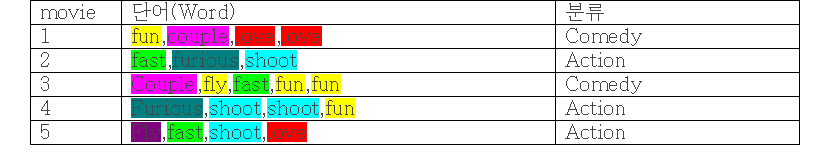

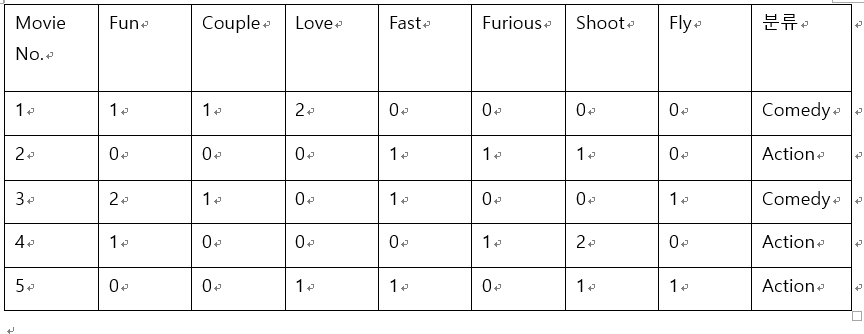
            어떤 문서에 “fun,furious,fast” 라는 3개의 단어가 있을때,  이 문서가 코메디인지 액션 영화인지?

P(comedy|words) = P(words|comedy)*P(comedy)/P(words) 

P(action|words) = P(words|action)*P(action)/P(words)


P(words|comedy) = P(fast,furious,fun|comedy) = P(fast|comdey)* P(furious|comedy)* P(fun|comedy)

P(fast|comedy) = 1/9

P(furious|comedy) = 0/9

P(fun|comedy) = 3/9

......

### Log를 이용한 언더 플로우 방지
단어의 확률의 곱으로 계산될때, 단어가 많아질수록 소수점 아래로 계속 내려가 매우 작은값까지 내려가 언더플로우 현상 발생

** log(a*b) = log (a) + log(b)

P(comedy|words) = P(words|comedy)* P(comedy)
-> 양변에 log 를  취해주면 Log(P(comedy|words)) = Log(P(words|comedy) * P(comedy))


Log(P(words|comedy)* P(comedy)) 

= Log(P(fun|comedy)* P(furious|comedy)* …* P(Comedy) ) 

= log(P(fun|comedy))+log(P(furious|comedy)+…+log(P(Comedy)) 로 계산할 수 있다


In [19]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [20]:
model_mult = MultinomialNB().fit(X, y)

In [21]:
model_mult.classes_

array([0, 1])

In [22]:
model_mult.class_log_prior_

array([-0.91629073, -0.51082562])

In [23]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

In [24]:
model_mult.feature_count_

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [25]:
np.exp(model_mult.feature_log_prob_)
#feature_log_prob_는 X의 갯수를 X의 합으로 나눈 값에 라플라스 스무딩(default: 1)을 적용해 로그를 취한 결과

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [26]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [27]:
model_mult.predict([x_new])

array([1])

#### ▶ 텍스트 분류 예제

In [28]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #카테고리 20개 중 4개만 사용
train = fetch_20newsgroups(subset='train', categories=categories)   #train set

test = fetch_20newsgroups(subset='test', categories=categories) #test set

In [31]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [33]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [34]:
model.classes_  #카테고리 4개였으므로 

array([0, 1, 2, 3], dtype=int64)

In [35]:
model.predict_proba(test.data) #각 카테고리에 대한 확률

array([[0.03203008, 0.06426687, 0.69667014, 0.2070329 ],
       [0.49658617, 0.20448588, 0.24348141, 0.05544654],
       [0.01898103, 0.91767761, 0.05099168, 0.01234967],
       ...,
       [0.06157215, 0.82793315, 0.08905151, 0.02144319],
       [0.01032313, 0.05144075, 0.9113641 , 0.02687202],
       [0.18592358, 0.47989239, 0.29998362, 0.0342004 ]])

In [36]:
accuracy_score(test.target,labels)

0.8016759776536313

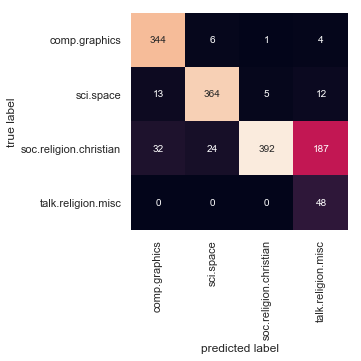

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.ylabel('true label')
plt.xlabel('predicted label');

## 3. Bernoulli Naive Bayes(베르누이 나이브 베이즈)
#### 다항 나이브 베이즈는 각 이벤트/항목에 대한 빈도수라면, 베르누이는 출현 여부만 나타냄(0,1로만 나타냄)

In [38]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [40]:
model_bern.classes_

array([0, 1])

In [41]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [42]:
np.exp(model_bern.feature_log_prob_)

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [43]:
x_new = np.array([1, 1, 0, 0])
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

### SPAM 분류 예제 <다항/베르누이 나이브 베이즈로 각각 분류하기>

In [44]:
import pandas as pd
mail_data = pd.read_csv('sms_spam_utf8.csv')
mail_data.head(10)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or 짙10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #문자열이나 정수로된 라벨 값을 정수로 바꿔줌

X = mail_data['text']
y = encoder.fit_transform(mail_data['type'])
y , encoder.inverse_transform(y)

(array([0, 0, 0, ..., 1, 1, 0]),
 array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype=object))

In [46]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
len(X_train)

4169

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3)   #min_df => 단어빈도가 최소 3번은 되어야함

train_vectors = vectorizer.fit_transform(X_train)  # Learn the vocabulary dictionary and return document-term matrix
test_vectors = vectorizer.transform(X_test) # Transform documents to document-term matrix.

In [49]:
X_train.head(10)

989                     Sorry battery died, yeah I'm here
2900            Uh, heads up we don't have THAT much left
4572    I enjoy watching and playing football and bask...
3351    FREE NOKIA Or Motorola with upto 12mths 1/2pri...
2477    Jason says it's cool if we pick some up from h...
965                            I will see in half an hour
542     I called but no one pick up e phone. I ask bot...
4136                               i dnt wnt to tlk wid u
439     Dont pick up d call when something important i...
4402    Congratulations ur awarded 500 of CD vouchers ...
Name: text, dtype: object

In [50]:
print(train_vectors[7])

  (0, 2239)	1
  (0, 2041)	1
  (0, 2260)	1
  (0, 634)	1


In [51]:
train_vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Multinomial NB

In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
pred = model.predict(test_vectors)
accuracy_score(y_test, pred)

0.9798561151079137

In [23]:
model.predict_proba(test_vectors).round(2)

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

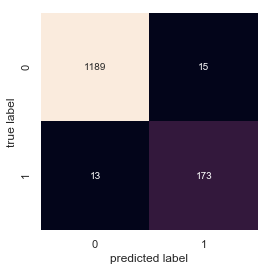

In [27]:
mat = confusion_matrix(y_test,pred) #true , pred 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

### Bernoulli NB

In [28]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB()
model_bern.fit(train_vectors,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [30]:
pred2 = model_bern.predict(test_vectors)
accuracy_score(y_test,pred2)

0.9863309352517986

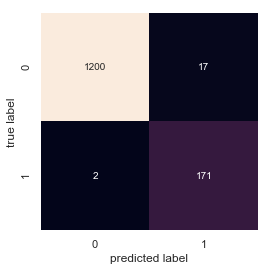

In [31]:
mat = confusion_matrix(y_test,pred2) #true , pred 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

### news data 예제  <다항/베르누이 나이브 베이즈로 각각 분류하기>

In [32]:
news = pd.read_csv('uci-news-aggregator.csv')

In [33]:
len(news)

422419

In [34]:
news.head(10)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212
6,7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405
7,8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,1394470372615
8,9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,1394470372792
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,1394470501265


In [35]:
encoder = LabelEncoder()

X = news['TITLE']
y = encoder.fit_transform(news['CATEGORY'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
len(X_train)

316814

In [37]:
len(X_test)

105605

In [38]:
X_train.head()

124798                   Yellen Says Europe Being Held Back
206465    'Once Upon a Time' season 4 spoilers: Series b...
381966     Ebola kills 21 more in West Africa, toll now 539
369860    Potato Salad Kickstarter by Zack Danger Brown ...
62913     'Once Upon a Time in Wonderland' series finale...
Name: TITLE, dtype: object

In [39]:
set(encoder.inverse_transform(y))  #카테고리 종류

{'b', 'e', 'm', 't'}

In [40]:
vectorizer = CountVectorizer(min_df=3)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [41]:
train_vectors.shape

(316814, 26013)

In [42]:
# one-hot vector
train_vectors.toarray()

MemoryError: 

### multinomial NB

In [43]:
model = MultinomialNB()
model.fit(train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
pred = model.predict(test_vectors)
accuracy_score(y_test,pred)

0.9249183277306946

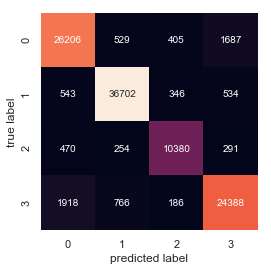

In [45]:
mat = confusion_matrix(y_test,pred) #true , pred 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

### Bernoulli NB

In [46]:
model = BernoulliNB()
model.fit(train_vectors,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
pred = model.predict(test_vectors)
accuracy_score(y_test, pred)

0.9248236352445434

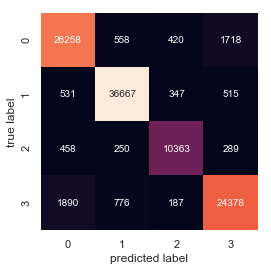

In [48]:
mat = confusion_matrix(y_test,pred) #true , pred 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label');

##  나이브 베이즈의 장점
- 트레이닝과 예측 모두에 있어서 빠르다
- 직접적인 예측 확률을 제공
- 해석이 쉬움
- 튜닝가능한 파라미터가 거의 없음 (?)

▶ 분류 작업의 가장 기초. 잘 작동하지 않는다면, 다른 분류 모델을 또 다시 사용해야함

## 나이브 베이즈 언제 사용하면 좋을까
- 실 데이터의 각 특성들이 독립적일때 (naive)
- 모델의 복잡성이 덜 중요한 경우, 카테고리 분류가 잘 되어있는 데이터 (y의 값이 다양한 경우)
- 모델의 복잡성이 덜 중요한 경우, 고차원의 데이터인 경우 (x가 많은 경우)

** 즉, 데이터가 충분할수록 나이브 베이즈 같이 간단한 분류 모델 또한 강력함